In [17]:
import pandas as pd
import missingno as msno
from sklearn import preprocessing
import re as re
import matplotlib.pyplot as plt

In [18]:
dataframe = pd.read_csv("dataset/chemicals_disease.csv", encoding = "latin-1")

In [19]:
#check dataframe is empty or not
dataframe.empty



False

In [20]:
dataframe.shape

(5713, 21)

In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5713 entries, 0 to 5712
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _unit_id                         5713 non-null   int64  
 1   _golden                          5713 non-null   bool   
 2   _unit_state                      5713 non-null   object 
 3   _trusted_judgments               5713 non-null   int64  
 4   _last_judgment_at                5160 non-null   object 
 5   comment_box                      5712 non-null   object 
 6   verify_relationship              5713 non-null   object 
 7   verify_relationship:confidence   5713 non-null   float64
 8   orig__golden                     553 non-null    object 
 9   chemical_id                      5713 non-null   object 
 10  chemical_name                    5713 non-null   object 
 11  disease_id                       5713 non-null   object 
 12  disease_name        

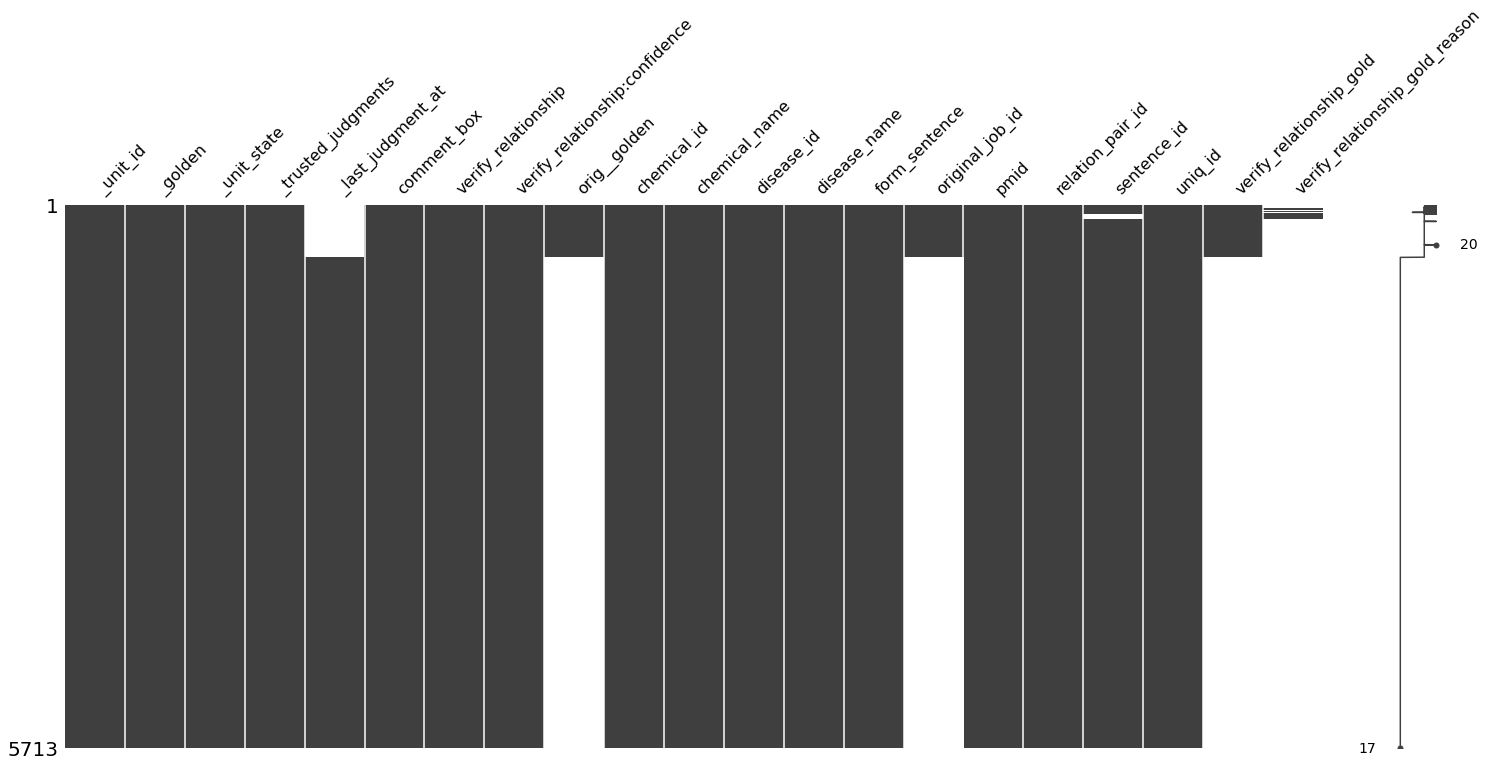

In [22]:
msno.matrix(dataframe)

In [23]:
dataframe.dropna(axis = "columns", inplace = True)

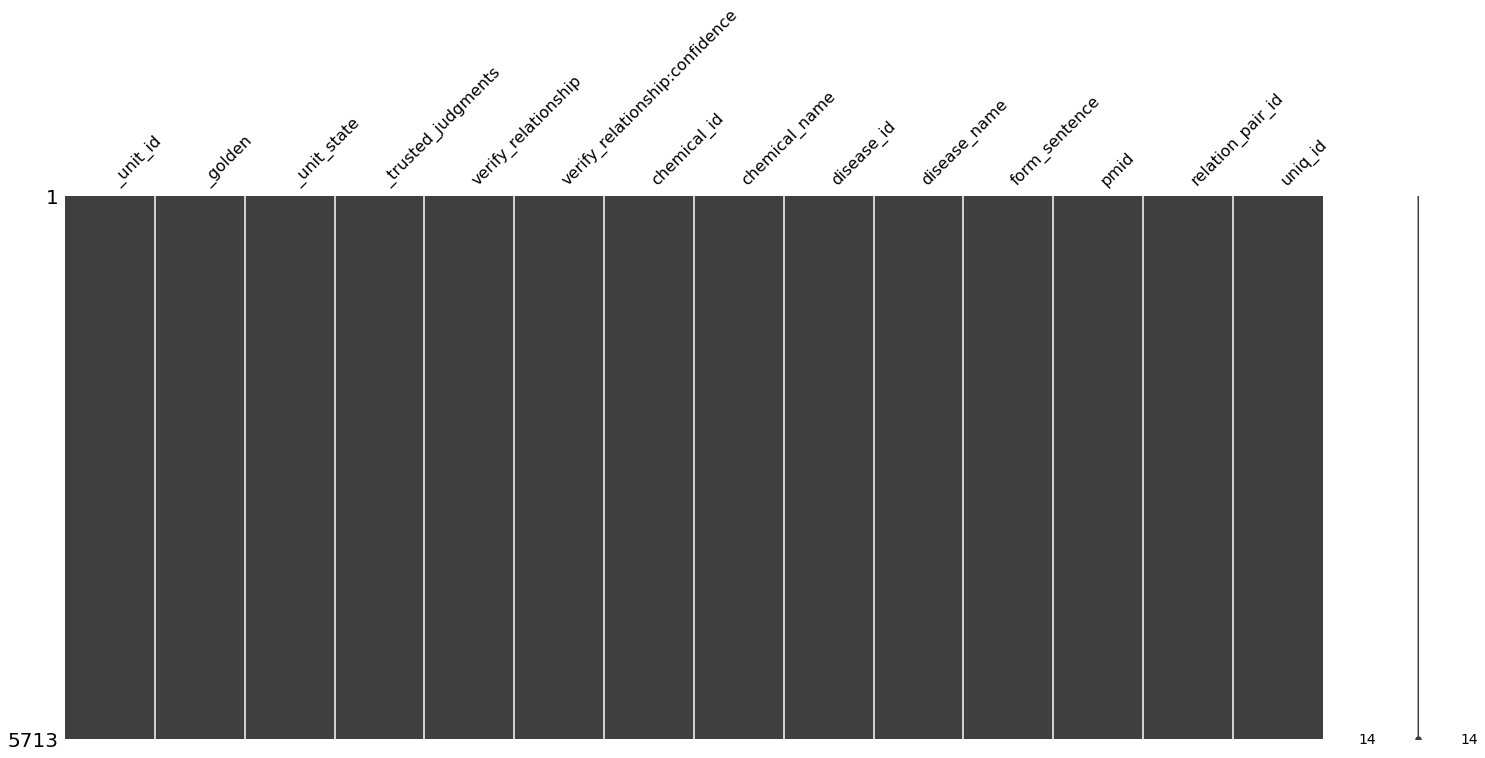

In [24]:
msno.matrix(dataframe)

In [25]:
dataframe

,_unit_id,_golden,_unit_state,_trusted_judgments,verify_relationship,verify_relationship:confidence,chemical_id,chemical_name,disease_id,disease_name,form_sentence,pmid,relation_pair_id,uniq_id
0,770955372,True,golden,9,yes_direct,0.4463,D012701,"<span class=""chemical"">5-HT</span>",D011605,"<span class=""disease"">psychotic disorders</span>",These animal models were considered to reflect...,20705401,20705401_D012701_D011605,bcv_easy_68_sent_dev_set_762850
1,770955373,True,golden,11,no_relation,0.9181,D010396,"<span class=""chemical"">D-penicillamine</span>",D012594,"<span class=""disease"">localized scleroderma</s...","Case reports of 11 patients with severe, exten...",2334179,2334179_D010396_D012594,bcv_easy_2399_sent_dev_set_762850
2,770955374,True,golden,12,no_relation,1.0000,D015016,"<span class=""chemical"">yohimbine</span>",D019964,"<span class=""disease"">affective disorders</span>",METHOD: Six patients with either obsessive com...,1535072,1535072_D015016_D019964,bcv_easy_642_sent_dev_set_762850
3,770955375,True,golden,11,no_relation,1.0000,D002118,"<span class=""chemical"">calcium</span>",D013035,"<span class=""disease"">muscle spasms</span>",While severe hypokalemia may cause muscle weak...,8492347,8492347_D002118_D013035,bcv_easy_1271_sent_dev_set_762850
4,770955376,True,golden,9,no_relation,0.8905,D064730,"<span class=""chemical"">dexrazoxane</span>",D006402,"<span class=""disease"">hematologic toxicity</span>",Clinical trials in patients with brain metasta...,15897593,15897593_D064730_D006402,bcv_easy_2793_sent_dev_set_762850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,770961086,False,finalized,5,yes_direct,1.0000,D008691,"<span class=""chemical"">methadone</span>",D003643,"<span class=""disease"">death</span>","The increased risk of <span class=""disease"">de...",25599329,25599329_D008691_D003643,bcv_sentence_task_befree_5155
5709,770961087,False,finalized,5,no_relation,1.0000,D014443,"<span class=""chemical"">tyrosine</span>",D008175,"<span class=""disease"">lung cancer</span>","Role of <span class=""chemical"">tyrosine</span>...",25701783,25701783_D014443_D008175,bcv_sentence_task_befree_5156
5710,770961088,False,finalized,5,no_relation,1.0000,D002945,"<span class=""chemical"">cisplatin</span>",D008175,"<span class=""disease"">lung cancer</span>",Role of tyrosine kinase-independent phosphoryl...,25701783,25701783_D002945_D008175,bcv_sentence_task_befree_5157
5711,770961089,False,finalized,5,no_relation,1.0000,D002945,"<span class=""chemical"">cisplatin</span>",D009369,"<span class=""disease"">cancer</span>",We therefore introduce a potential combinatori...,25701783,25701783_D002945_D009369,bcv_sentence_task_befree_5158


In [26]:
dataframe["chemical_name"] = dataframe.chemical_name.apply(lambda x: re.sub('<[^<]+?>', '', x))
dataframe["disease_name"] = dataframe.disease_name.apply(lambda x: re.sub('<[^<]+?>', '', x))
dataframe

,_unit_id,_golden,_unit_state,_trusted_judgments,verify_relationship,verify_relationship:confidence,chemical_id,chemical_name,disease_id,disease_name,form_sentence,pmid,relation_pair_id,uniq_id
0,770955372,True,golden,9,yes_direct,0.4463,D012701,5-HT,D011605,psychotic disorders,These animal models were considered to reflect...,20705401,20705401_D012701_D011605,bcv_easy_68_sent_dev_set_762850
1,770955373,True,golden,11,no_relation,0.9181,D010396,D-penicillamine,D012594,localized scleroderma,"Case reports of 11 patients with severe, exten...",2334179,2334179_D010396_D012594,bcv_easy_2399_sent_dev_set_762850
2,770955374,True,golden,12,no_relation,1.0000,D015016,yohimbine,D019964,affective disorders,METHOD: Six patients with either obsessive com...,1535072,1535072_D015016_D019964,bcv_easy_642_sent_dev_set_762850
3,770955375,True,golden,11,no_relation,1.0000,D002118,calcium,D013035,muscle spasms,While severe hypokalemia may cause muscle weak...,8492347,8492347_D002118_D013035,bcv_easy_1271_sent_dev_set_762850
4,770955376,True,golden,9,no_relation,0.8905,D064730,dexrazoxane,D006402,hematologic toxicity,Clinical trials in patients with brain metasta...,15897593,15897593_D064730_D006402,bcv_easy_2793_sent_dev_set_762850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,770961086,False,finalized,5,yes_direct,1.0000,D008691,methadone,D003643,death,"The increased risk of <span class=""disease"">de...",25599329,25599329_D008691_D003643,bcv_sentence_task_befree_5155
5709,770961087,False,finalized,5,no_relation,1.0000,D014443,tyrosine,D008175,lung cancer,"Role of <span class=""chemical"">tyrosine</span>...",25701783,25701783_D014443_D008175,bcv_sentence_task_befree_5156
5710,770961088,False,finalized,5,no_relation,1.0000,D002945,cisplatin,D008175,lung cancer,Role of tyrosine kinase-independent phosphoryl...,25701783,25701783_D002945_D008175,bcv_sentence_task_befree_5157
5711,770961089,False,finalized,5,no_relation,1.0000,D002945,cisplatin,D009369,cancer,We therefore introduce a potential combinatori...,25701783,25701783_D002945_D009369,bcv_sentence_task_befree_5158


In [27]:
dataframe.dtypes

_unit_id                            int64
_golden                              bool
_unit_state                        object
_trusted_judgments                  int64
verify_relationship                object
verify_relationship:confidence    float64
chemical_id                        object
chemical_name                      object
disease_id                         object
disease_name                       object
form_sentence                      object
pmid                                int64
relation_pair_id                   object
uniq_id                            object
dtype: object

In [28]:
dataframe.groupby("disease_name").size()

disease_name
A deficiencies                  2
A549 lung adenocarcinoma        1
ABL                             5
ABRS                            1
ACS                             1
                               ..
weakness in both hypokalemic    1
weight gain                     4
weight loss                     4
widespread disease              1
xerostomia                      4
Length: 1785, dtype: int64

In [29]:
dataframe.groupby("verify_relationship").size()

verify_relationship
no_relation     4722
yes_direct       980
yes_indirect      11
dtype: int64

In [30]:
binarizer = preprocessing.LabelBinarizer()
dataframe["verify_relationship"] = binarizer.fit_transform(dataframe["verify_relationship"])

In [31]:
dataframe["_unit_state"] = binarizer.fit_transform(dataframe["_unit_state"])

In [32]:
dataframe.groupby("verify_relationship").size()

verify_relationship
0     991
1    4722
dtype: int64